In [117]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [118]:
df = pd.read_csv('datasets/customer_churn_dataset.csv')

In [119]:
df.head()

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,Yes


In [120]:
df.shape

(20000, 11)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       20000 non-null  int64  
 1   tenure            20000 non-null  int64  
 2   monthly_charges   20000 non-null  float64
 3   total_charges     20000 non-null  float64
 4   contract          20000 non-null  object 
 5   payment_method    20000 non-null  object 
 6   internet_service  17987 non-null  object 
 7   tech_support      20000 non-null  object 
 8   online_security   20000 non-null  object 
 9   support_calls     20000 non-null  int64  
 10  churn             20000 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.7+ MB


In [122]:
df.describe()

,customer_id,tenure,monthly_charges,total_charges,support_calls
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,10000.500000,36.467450,70.010531,2543.979209,1.51255
std,5773.647028,20.773984,28.890239,1882.949804,1.23524
min,1.000000,1.000000,20.000000,20.230000,0.00000
25%,5000.750000,18.000000,45.210000,1045.837500,1.00000
50%,10000.500000,36.000000,70.090000,2096.495000,1.00000
75%,15000.250000,54.000000,95.072500,3690.337500,2.00000
max,20000.000000,72.000000,120.000000,8629.920000,8.00000


In [123]:
df.isna().sum()

customer_id            0
tenure                 0
monthly_charges        0
total_charges          0
contract               0
payment_method         0
internet_service    2013
tech_support           0
online_security        0
support_calls          0
churn                  0
dtype: int64

In [124]:
df['internet_service'].unique()

array(['DSL', 'Fiber', nan], dtype=object)

In [125]:
df['internet_service'] = df['internet_service'].fillna('No')

In [126]:
df.isna().sum()

customer_id         0
tenure              0
monthly_charges     0
total_charges       0
contract            0
payment_method      0
internet_service    0
tech_support        0
online_security     0
support_calls       0
churn               0
dtype: int64

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       20000 non-null  int64  
 1   tenure            20000 non-null  int64  
 2   monthly_charges   20000 non-null  float64
 3   total_charges     20000 non-null  float64
 4   contract          20000 non-null  object 
 5   payment_method    20000 non-null  object 
 6   internet_service  20000 non-null  object 
 7   tech_support      20000 non-null  object 
 8   online_security   20000 non-null  object 
 9   support_calls     20000 non-null  int64  
 10  churn             20000 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.7+ MB


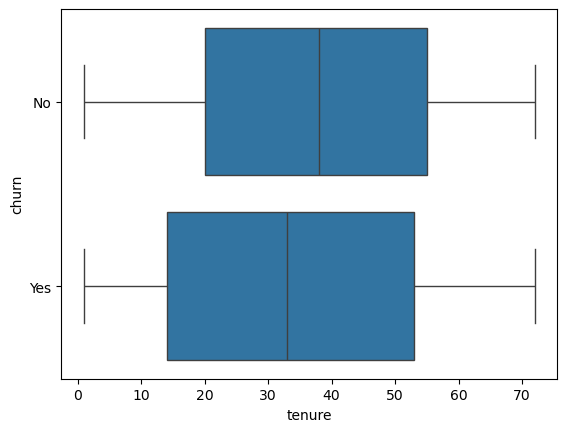

In [128]:
sns.boxplot(data=df, x=df['tenure'], y=df['churn'])
plt.show()

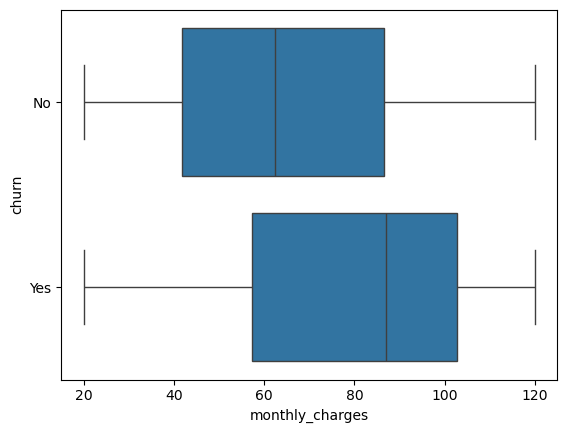

In [129]:
sns.boxplot(data=df, x=df['monthly_charges'], y=df['churn'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

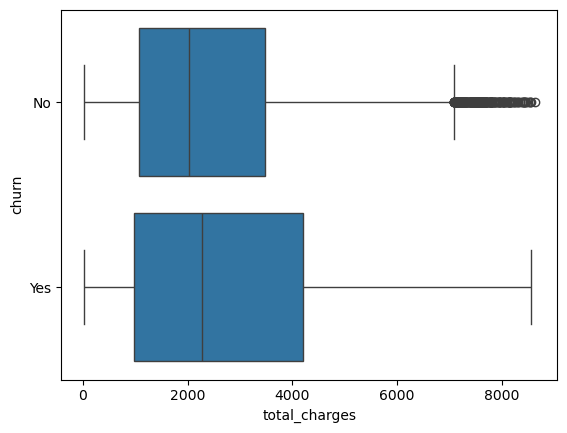

In [130]:
sns.boxplot(data=df, x=df['total_charges'], y=df['churn'])
plt.show

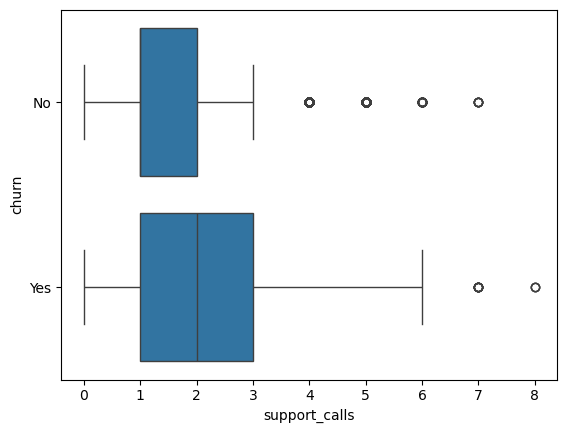

In [131]:
sns.boxplot(data=df, x=df['support_calls'], y=df['churn'])
plt.show()

([<matplotlib.patches.Wedge at 0x30aca6b10>,
 [Text(-0.523406311074485, 0.9674946167950496, 'No'),
  Text(0.523406395655552, -0.967494571037411, 'Yes')],
 [Text(-0.2854943514951736, 0.5277243364336633, '65.8%'),
  Text(0.28549439763030104, -0.5277243114749514, '34.2%')])

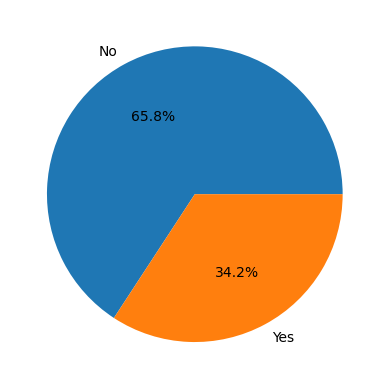

In [132]:
counts = df['churn'].value_counts()
plt.pie(x=counts, labels=counts.index, autopct='%1.1f%%')

In [133]:
df.head()

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,Yes


In [134]:
df['tech_support'].unique()

array(['No', 'Yes'], dtype=object)

In [135]:
df['online_security'].unique()

array(['Yes', 'No'], dtype=object)

In [136]:
X = df.drop(columns='churn')
y = df['churn']

In [137]:
y = df['churn'].map({'No': 0, 'Yes': 1})

In [138]:
to_scale = ['tenure', 'monthly_charges', 'total_charges']
to_ode = ['tech_support', 'online_security']
to_ohe = ['contract', 'payment_method', 'internet_service']

In [139]:
num_pipeline = Pipeline([
    ('scale', StandardScaler())
])

ord_pipeline = Pipeline([
    ('ode', OrdinalEncoder())
])

ohe_pipeline = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

In [140]:
preprocessor = ColumnTransformer([
    ('num', num_pipeline, to_scale),
    ('ode', ord_pipeline, to_ode),
    ('ohe', ohe_pipeline, to_ohe)
])

In [141]:
X_processed = preprocessor.fit_transform(X)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print(classification_report(y_test, y_pred_rfc))


              precision    recall  f1-score   support

           0       0.78      0.88      0.83      2645
           1       0.68      0.52      0.59      1355

    accuracy                           0.76      4000
   macro avg       0.73      0.70      0.71      4000
weighted avg       0.75      0.76      0.75      4000



In [144]:
device = 'mps' if torch.mps.is_available() else 'cpu'
device

'mps'

In [145]:
y_train.shape

(16000,)

In [146]:
X_train = torch.tensor(X_train, dtype=torch.float).to(device)
X_test = torch.tensor(X_test, dtype=torch.float).to(device)
y_train = torch.tensor(y_train.values, dtype=torch.float).to(device)
y_test = torch.tensor(y_test.values, dtype=torch.float).to(device)

In [147]:
class NeuralNetwork(nn.Module):
    def __init__(self, input, output, hidden):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_features=input, out_features=hidden),
            nn.ReLU(),
            nn.Linear(in_features=hidden, out_features=hidden),
            nn.ReLU(),
            nn.Linear(in_features=hidden, out_features=output)
        )
    def forward(self, x):
        return self.net(x)
    
model = NeuralNetwork(input=X_train.shape[1], output=1, hidden=8).to(device)
model


NeuralNetwork(
  (net): Sequential(
    (0): Linear(in_features=15, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=1, bias=True)
  )
)

In [148]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

In [154]:
torch.manual_seed(42)
torch.mps.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
    model.train()
    y_train_logits = model(X_train).squeeze()
    y_train_loss = criterion(y_train_logits, y_train)
    y_train_preds = torch.round(torch.sigmoid(y_train_logits))
    y_train_acc = (y_train_preds == y_train.unsqueeze(1)).float().mean()
    optimizer.zero_grad()
    y_train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        y_test_logits = model(X_test).squeeze()
        y_test_loss = criterion(y_test_logits, y_test)
        y_test_preds = torch.round(torch.sigmoid(y_test_logits))
        y_test_acc = (y_test_preds == y_test.unsqueeze(1)).float().mean()

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} || Train Loss: {y_train_loss} || Train Accuracy: {y_train_acc} || Test Loss: {y_test_loss} || Test Accuracy: {y_test_acc}")



Epoch: 0 || Train Loss: 0.7265955209732056 || Train Accuracy: 0.34299999475479126 || Test Loss: 0.7222957611083984 || Test Accuracy: 0.3387500047683716
Epoch: 100 || Train Loss: 0.6375564932823181 || Train Accuracy: 0.6570000052452087 || Test Loss: 0.6348721981048584 || Test Accuracy: 0.6612499952316284
Epoch: 200 || Train Loss: 0.6197305917739868 || Train Accuracy: 0.6570000052452087 || Test Loss: 0.6162939667701721 || Test Accuracy: 0.6612499952316284
Epoch: 300 || Train Loss: 0.5805866122245789 || Train Accuracy: 0.6255999803543091 || Test Loss: 0.5751115679740906 || Test Accuracy: 0.6265006065368652
Epoch: 400 || Train Loss: 0.5525674819946289 || Train Accuracy: 0.5912562608718872 || Test Loss: 0.5450263023376465 || Test Accuracy: 0.5941699743270874
Epoch: 500 || Train Loss: 0.543770968914032 || Train Accuracy: 0.5876452326774597 || Test Loss: 0.5352945923805237 || Test Accuracy: 0.5918318629264832
Epoch: 600 || Train Loss: 0.5402477383613586 || Train Accuracy: 0.5875667333602905 |